# Winding the Fourier with Amp Modulation

We'll cheat by using sklearn.naive_bayes to train a spam classifier! Most of the code is just loading our training data into a pandas DataFrame that we can play with:

In [45]:
import numpy as np
import matplotlib.pyplot as plt
import cmath as cm
import math
from pandas import DataFrame
#from sklearn.feature_extraction.text import CountVectorizer
#from sklearn.naive_bayes import MultinomialNB




Ok imports are done.

In [59]:

def rect(r, theta):
    """theta in radians

    returns tuple; (float, float); (x,y)
    """
    x = r * math.cos(theta)
    y = r * math.sin(theta)
    return x,y

def polar(x, y):
    """returns r, theta(radians)
    """
    r, theta = cm.polar( complex(x,y) );

    return r, theta



polarvec = np.vectorize(polar); # Vectorize these func's to operate on vectors
rectvec  = np.vectorize(rect)




Functions for complex vectors

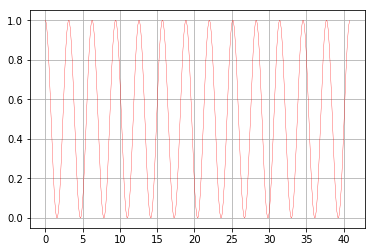

In [78]:


vecFreq = 2
tiVec = np.arange(0,13*np.pi,13*np.pi/1000)
lenTi = len(tiVec)
ampVec1 = (1/2)* (np.cos(vecFreq*tiVec)+1)
compExp = np.array( [ complex(0,0)] * lenTi )

plt.plot(tiVec,ampVec1,'r',linewidth=0.3)
plt.grid()
#plt.gca().set_aspect('equal', adjustable='box'); plt.draw();
plt.show()
#print(dir(plt.gca()))

Setup the vectors, multiply mag, etc

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_add_text', '_adjustable', '_agg_filter', '_alpha', '_anchor', '_animated', '_aspect', '_autoscaleXon', '_autoscaleYon', '_axes', '_axes_class', '_axes_locator', '_axisbelow', '_cachedRenderer', '_clipon', '_clippath', '_connected', '_contains', '_current_image', '_facecolor', '_frameon', '_gci', '_gen_axes_patch', '_gen_axes_spines', '_get_axis_list', '_get_legend_handles', '_get_lines', '_get_patches_for_fill', '_get_view', '_gid', '_gridOn', '_hold', '_init_axis', '_label', '_left_title', '_make_twin_axes', '_mouseover', '_navigate', '_navigate_mode', '_oid', '_on_units_changed', '_originalPosition', '_path_effe

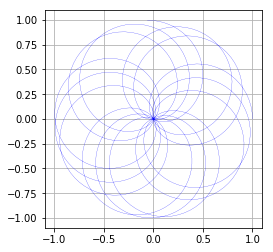

In [81]:
#plt.figure()
ceFreq = 0.79
compExp.real = np.cos(0.79*vecFreq*tiVec)
compExp.imag = np.sin((0.79*vecFreq*tiVec))

[compMag, compAng] = polarvec(compExp.real,compExp.imag); compMag = compMag * ampVec1;
[compExp.real, compExp.imag ] = rectvec(compMag,compAng )

plt.plot(compExp.real,compExp.imag,'b',linewidth=0.2)
plt.grid(); plt.gca().set_aspect('equal', adjustable='box'); plt.draw();
print( dir(plt.gca()) )
plt.set_xlim([-1.5,1.5]); plt.set_ylim([-1.5,1.5]);
plt.show();

## Activity

Our data set is small, so our spam classifier isn't actually very good. Try running some different test emails through it and see if you get the results you expect.

If you really want to challenge yourself, try applying train/test to this spam classifier - see how well it can predict some subset of the ham and spam emails.